In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir("/Users/macbookpro/Documents/Projects/Air_Pollution_Monitoring")
from data_analysis import *


plt.rcParams["figure.figsize"] = (20,12)

In [2]:
# read the data from the data base, save it as a csv file
filename = read_data("Swiss")

In [3]:
# load the csv file
raw_df = pd.read_csv(filename)

In [4]:
raw_df.head()

,timestamp,mq7,mq8,mq135,temperature,humidity
0,1677101952,1983.0,752.0,1564.0,23.4,37.0
1,1677101974,1965.0,749.0,1557.0,23.4,36.0
2,1677101996,1931.0,752.0,1557.0,23.4,36.0
3,1677102018,1942.0,749.0,1558.0,23.4,36.0
4,1677102038,1904.0,752.0,1550.0,23.4,36.0


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227267 entries, 0 to 227266
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   timestamp    227267 non-null  int64  
 1   mq7          227267 non-null  float64
 2   mq8          227267 non-null  float64
 3   mq135        227267 non-null  float64
 4   temperature  227060 non-null  float64
 5   humidity     227060 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 10.4 MB


In [6]:
# localize the timezone to Zurich and replace non existent values with the next timestamp
raw_df['timestamp'] = pd.to_datetime(raw_df.timestamp, unit='s').dt.tz_localize("Europe/Zurich", nonexistent=pd.Timedelta('1H'))
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227267 entries, 0 to 227266
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype                        
---  ------       --------------   -----                        
 0   timestamp    227267 non-null  datetime64[ns, Europe/Zurich]
 1   mq7          227267 non-null  float64                      
 2   mq8          227267 non-null  float64                      
 3   mq135        227267 non-null  float64                      
 4   temperature  227060 non-null  float64                      
 5   humidity     227060 non-null  float64                      
dtypes: datetime64[ns, Europe/Zurich](1), float64(5)
memory usage: 10.4 MB


In [7]:
raw_df.head()

,timestamp,mq7,mq8,mq135,temperature,humidity
0,2023-02-22 21:39:12+01:00,1983.0,752.0,1564.0,23.4,37.0
1,2023-02-22 21:39:34+01:00,1965.0,749.0,1557.0,23.4,36.0
2,2023-02-22 21:39:56+01:00,1931.0,752.0,1557.0,23.4,36.0
3,2023-02-22 21:40:18+01:00,1942.0,749.0,1558.0,23.4,36.0
4,2023-02-22 21:40:38+01:00,1904.0,752.0,1550.0,23.4,36.0


In [8]:
# check for missing values
raw_df.isna().sum()

timestamp        0
mq7              0
mq8              0
mq135            0
temperature    207
humidity       207
dtype: int64

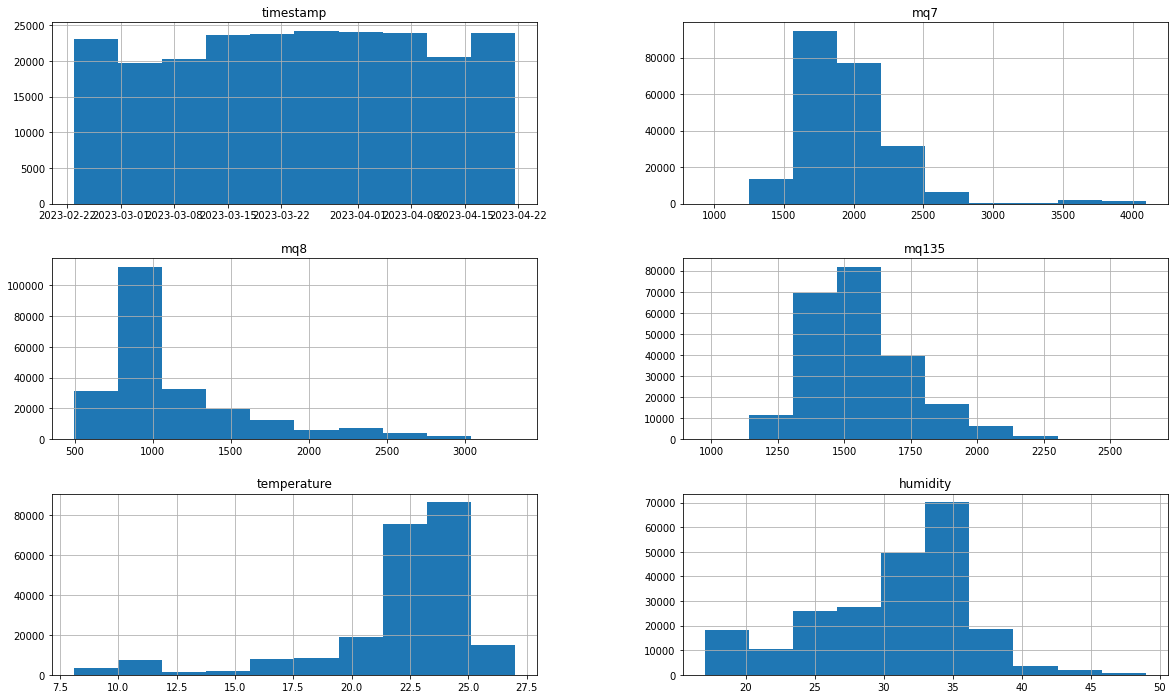

In [9]:
raw_df.hist();

In [10]:
def impute(df, column):
    df_copy = df.copy()
    
    ff = df_copy[column].ffill()
    bf = df_copy[column].bfill()
    
    df_copy[column] = (ff + bf) / 2
    
    return df_copy

In [11]:
# Impute the missing temperature and humidity values
df = impute(raw_df, "temperature")
df = impute(df, "humidity")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227267 entries, 0 to 227266
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype                        
---  ------       --------------   -----                        
 0   timestamp    227267 non-null  datetime64[ns, Europe/Zurich]
 1   mq7          227267 non-null  float64                      
 2   mq8          227267 non-null  float64                      
 3   mq135        227267 non-null  float64                      
 4   temperature  227267 non-null  float64                      
 5   humidity     227267 non-null  float64                      
dtypes: datetime64[ns, Europe/Zurich](1), float64(5)
memory usage: 10.4 MB


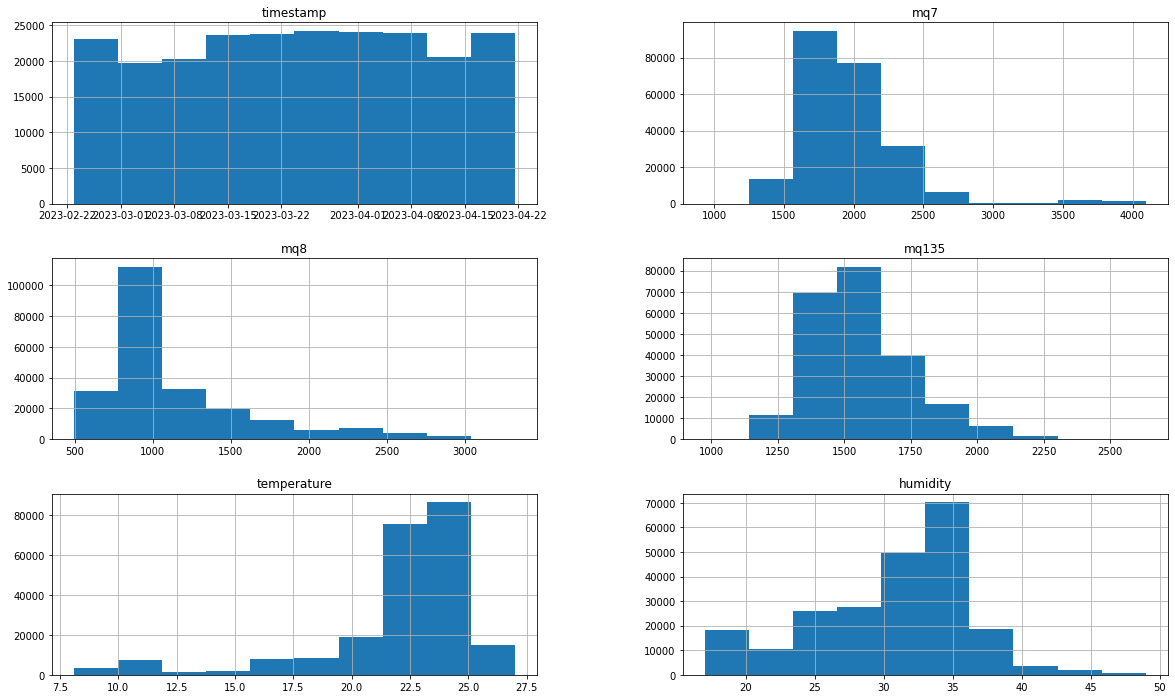

In [12]:
df.hist();

In [13]:
df.isna().sum()

timestamp      0
mq7            0
mq8            0
mq135          0
temperature    0
humidity       0
dtype: int64

In [14]:
# set the datetime columm as the index and resample data in 5 mins durations
# reindexes the index column too
df.set_index("timestamp", inplace=True)
df = df.resample("5T", label="right").mean()
df

,mq7,mq8,mq135,temperature,humidity
timestamp,,,,,
2023-02-22 21:40:00+01:00,1959.666667,751.000000,1559.333333,23.400000,36.333333
2023-02-22 21:45:00+01:00,1871.500000,737.285714,1519.214286,23.400000,35.714286
2023-02-22 21:50:00+01:00,1814.333333,749.466667,1508.000000,23.400000,35.000000
2023-02-22 21:55:00+01:00,1735.642857,745.928571,1483.571429,23.021429,35.000000
2023-02-22 22:00:00+01:00,1691.466667,728.533333,1445.400000,23.000000,35.000000
...,...,...,...,...,...
2023-04-21 15:30:00+02:00,2292.642857,1380.500000,1596.428571,24.035714,38.000000
2023-04-21 15:35:00+02:00,2277.461538,1373.461538,1590.000000,23.807692,38.000000
2023-04-21 15:40:00+02:00,2269.142857,1373.571429,1583.142857,24.035714,38.000000


In [15]:
df.isna().sum()

mq7            835
mq8            835
mq135          835
temperature    835
humidity       835
dtype: int64

In [16]:
# shape before reindex
df.shape

(16623, 5)

In [17]:
# shape after reindex
df.shape

(16623, 5)

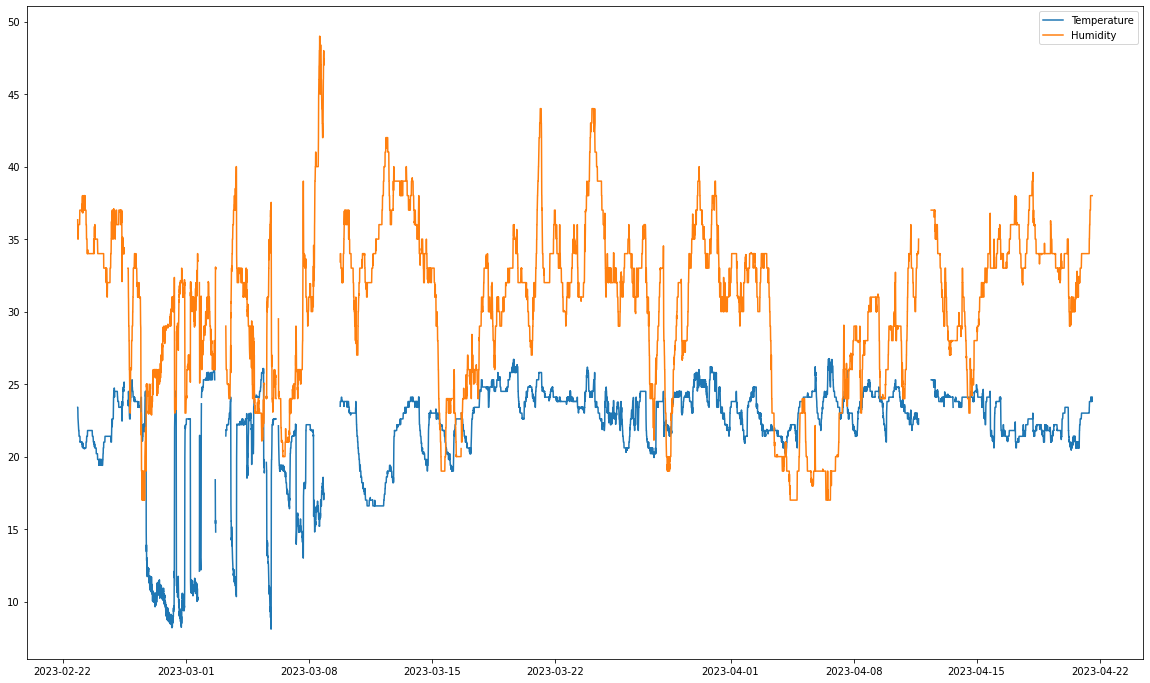

In [18]:
plt.plot(df.temperature, label="Temperature")
plt.plot(df.humidity, label="Humidity")
plt.legend();

In [19]:
def fill_missing_values(df, column, method="time"):
    df_filled = df.copy()
    df_filled[column] = df[column].interpolate(method=method)
    
    return df_filled

In [20]:
for col_name in df.columns:
    df = fill_missing_values(df, col_name)
    
df.isna().sum()

mq7            0
mq8            0
mq135          0
temperature    0
humidity       0
dtype: int64

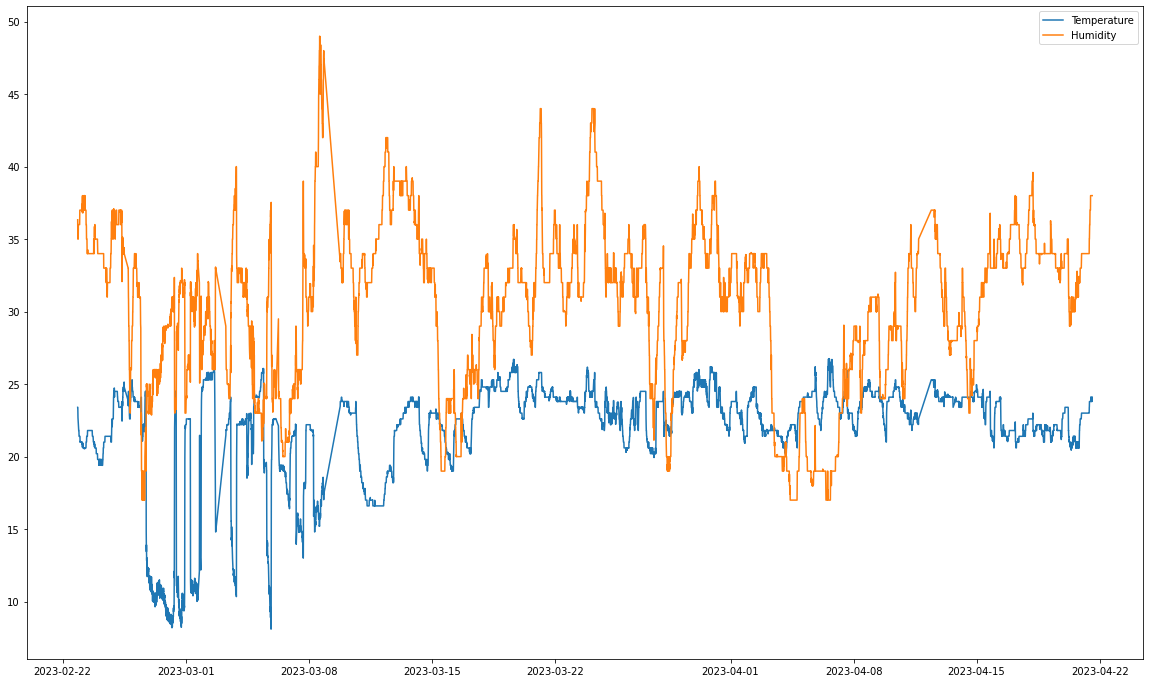

In [21]:
plt.plot(df.temperature, label="Temperature")
plt.plot(df.humidity, label="Humidity")
plt.legend();

In [22]:
# Make training features
df.reset_index(inplace=True)
df["date"] = df.timestamp.dt.date
df["time"] = df.timestamp.dt.time
df["dayofweek"] = df.timestamp.dt.dayofweek
df["day"] = df.timestamp.dt.day
df["hour"] = df.timestamp.dt.hour
df["minute"] = df.timestamp.dt.minute

In [23]:
df

,timestamp,mq7,mq8,mq135,temperature,humidity,date,time,dayofweek,day,hour,minute
0,2023-02-22 21:40:00+01:00,1959.666667,751.000000,1559.333333,23.400000,36.333333,2023-02-22,21:40:00,2,22,21,40
1,2023-02-22 21:45:00+01:00,1871.500000,737.285714,1519.214286,23.400000,35.714286,2023-02-22,21:45:00,2,22,21,45
2,2023-02-22 21:50:00+01:00,1814.333333,749.466667,1508.000000,23.400000,35.000000,2023-02-22,21:50:00,2,22,21,50
3,2023-02-22 21:55:00+01:00,1735.642857,745.928571,1483.571429,23.021429,35.000000,2023-02-22,21:55:00,2,22,21,55
4,2023-02-22 22:00:00+01:00,1691.466667,728.533333,1445.400000,23.000000,35.000000,2023-02-22,22:00:00,2,22,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16618,2023-04-21 15:30:00+02:00,2292.642857,1380.500000,1596.428571,24.035714,38.000000,2023-04-21,15:30:00,4,21,15,30
16619,2023-04-21 15:35:00+02:00,2277.461538,1373.461538,1590.000000,23.807692,38.000000,2023-04-21,15:35:00,4,21,15,35
16620,2023-04-21 15:40:00+02:00,2269.142857,1373.571429,1583.142857,24.035714,38.000000,2023-04-21,15:40:00,4,21,15,40
16621,2023-04-21 15:45:00+02:00,2266.642857,1370.142857,1578.214286,24.078571,38.000000,2023-04-21,15:45:00,4,21,15,45
